In [197]:
import numpy as np
import networkx as nx
from regain.covariance.missing_temporal_graphical_lasso import MissingTimeGraphicalLasso
from regain.covariance.kernel_time_graphical_lasso_ import KernelTimeGraphicalLasso
from regain.utils import is_pos_def
from regain.datasets import make_dataset
from sklearn.gaussian_process import kernels

In [211]:
results_TGL = []
results= {10:[], 20:[], 30:[], 40:[], 50:[]}
thetas = []

In [322]:
kernel = kernels.RBF(length_scale=20)(np.arange(10)[:, None])

tgl = KernelTimeGraphicalLasso(alpha=10, kernel=kernel, psi='l1')
mgl = MissingTimeGraphicalLasso(alpha=0.1, kernel=kernel, psi='l1', verbose=0, tol=1e-4)


In [277]:
res = make_dataset(n_dim_obs=n_dim_obs, n_dim_lat=0, n_samples=100, update_theta='l1')


In [320]:
tgl.fit(res['X'], res['y'])

/home/vero/git_repos/regain/regain/covariance/kernel_time_graphical_lasso_.py:236: UserWarning: Objective did not converge.
  warnings.warn("Objective did not converge.")


KernelTimeGraphicalLasso(alpha=10, assume_centered=False, beta=1,
             compute_objective=True, init='empirical', ker_param=1,
             kernel=array([[1.     , 0.99875, ..., 0.92312, 0.90371],
       [0.99875, 1.     , ..., 0.94059, 0.92312],
       ...,
       [0.92312, 0.94059, ..., 1.     , 0.99875],
       [0.90371, 0.92312, ..., 0.99875, 1.     ]]),
             max_iter=100, max_iter_ext=100, psi='l1',
             return_history=False, rho=1.0, rtol=0.0001, tol=0.0001,
             update_rho_options=None, verbose=False)

In [321]:
structure_error(res['thetas'], tgl.precision_)

{'tp': 620,
 'tn': 3216,
 'fp': 146,
 'fn': 18,
 'precision': 0.8093994778067886,
 'recall': 0.9717868338557993,
 'f1': 0.8831908831908831,
 'accuracy': 0.959,
 'false_omission_rate': 0.0055658627087198514,
 'fdr': 0.1906005221932115,
 'npv': 0.9944341372912802,
 'prevalence': 0.1595,
 'miss_rate': 0.02821316614420063,
 'fall_out': 0.04342653182629387,
 'specificity': 0.9565734681737061,
 'plr': 22.377721475501353,
 'nlr': 0.02949398774154307,
 'dor': 758.7214611872146,
 'balanced_accuracy': 0.9641801510147527,
 'average_precision': 0.9501576875037058,
 'mcc': 0.879298318190806}

In [323]:
n_dim_obs = 20
n_samples = 100 
total = n_dim_obs * n_samples
for i in range(3):
    res = make_dataset(n_dim_obs=n_dim_obs, n_dim_lat=0, n_samples=100, update_theta='l1')
    X_mis = np.copy(res['data'])
    tgl.fit(res['X'], res['y'])
    results_TGL.append(tgl.precision_)
    thetas.append(res['thetas'])
    for perc in [10,20,30]:
        for t in range(10):
            X_mis[t, np.random.choice(np.arange(100), int((perc/100)*total)),
                  np.random.choice(np.arange(n_dim_obs), int((perc/100)*total))] = np.nan
            
            X_ = np.vstack(X_mis)
            mgl.fit(X_, res['y'])
            results[perc].append(mgl.precision_)
    print("done", i)

/home/vero/git_repos/regain/regain/covariance/kernel_time_graphical_lasso_.py:236: UserWarning: Objective did not converge.
  warnings.warn("Objective did not converge.")


done 0


/home/vero/git_repos/regain/regain/covariance/kernel_time_graphical_lasso_.py:236: UserWarning: Objective did not converge.
  warnings.warn("Objective did not converge.")


done 1


/home/vero/git_repos/regain/regain/covariance/kernel_time_graphical_lasso_.py:236: UserWarning: Objective did not converge.
  warnings.warn("Objective did not converge.")


done 2


In [324]:
from importlib import reload
import regain.covariance.missing_graphical_lasso_; reload(regain.covariance.missing_graphical_lasso_)

import regain.covariance.missing_temporal_graphical_lasso; reload(regain.covariance.missing_temporal_graphical_lasso)
from regain.covariance.missing_temporal_graphical_lasso import MissingTimeGraphicalLasso
kernel = kernels.RBF(length_scale=1)(np.arange(10)[:, None])


In [325]:
len(results_TGL)

32

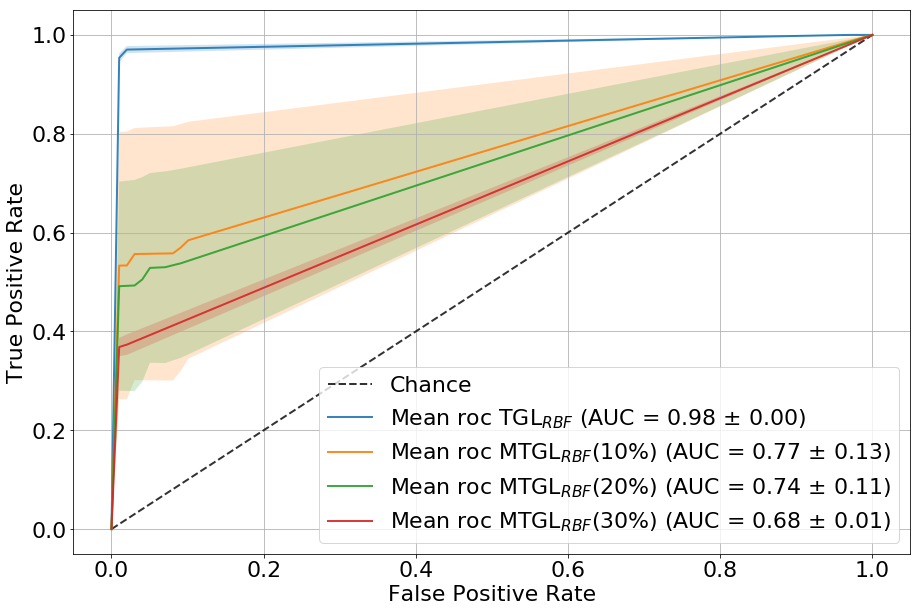

In [336]:
import regain.plotting.results; reload(regain.plotting.results)
from regain.plotting.results import plot_curve

plot_curve(thetas[-3:], {r'TGL$_{RBF}$': results_TGL[-3:], 
                          r'MTGL$_{RBF}$(10%)': results[10][-3:],
                          r'MTGL$_{RBF}$(20%)': results[20][-3:],
                          
                          r'MTGL$_{RBF}$(30%)': results[30][-3:],},
           filename="../../../../Dropbox (DIBRIS)/PhD/PhD thesis/Images/Missing-data/MTGLvsTGL-roc-20nodi.pdf", 
           fontsize=22, multiple=True)

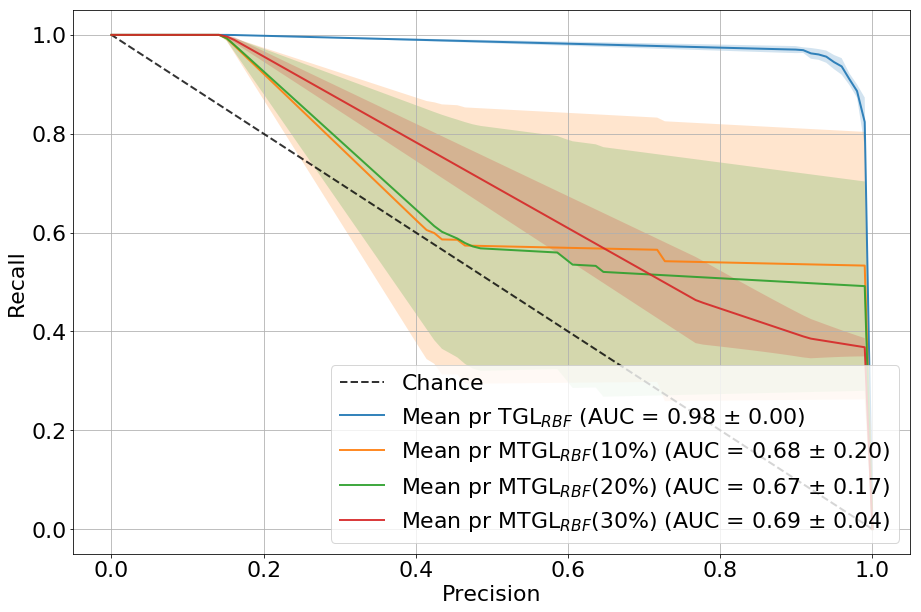

In [337]:

plot_curve(thetas[-3:], {r'TGL$_{RBF}$': results_TGL[-3:], 
                          r'MTGL$_{RBF}$(10%)': results[10][-3:],
                          r'MTGL$_{RBF}$(20%)': results[20][-3:],
                          
                          r'MTGL$_{RBF}$(30%)': results[30][-3:],},
            filename="../../../../Dropbox (DIBRIS)/PhD/PhD thesis/Images/Missing-data/MTGLvsTGL-pr-20nodi.pdf", 
           fontsize=22,multiple=True, mode='pr')

In [331]:
from importlib import reload
import regain.utils; reload(regain.utils)
from regain.utils import mean_structure_error
mean_structure_error(thetas[-3:], results_TGL[-3:], multiple=True)

{'tp': '383.3333333333333+/-19.136933459209764',
 'tn': '3221.3333333333335+/-14.267289706021797',
 'fp': '177.33333333333334+/-10.624918300339484',
 'fn': '18.0+/-4.898979485566356',
 'precision': '0.6833651091549121+/-0.02323542151465706',
 'recall': '0.9555791259759795+/-0.010035460607111597',
 'f1': '0.7965522774509756+/-0.014208161346130732',
 'accuracy': '0.9011666666666667+/-0.0022484562605386647',
 'false_omission_rate': '0.005560946736555582+/-0.0015289030615888359',
 'fdr': '0.3166348908450879+/-0.02323542151465706',
 'npv': '0.9944390532634445+/-0.0015289030615888482',
 'prevalence': '0.10033333333333333+/-0.005778311941119904',
 'miss_rate': '0.044420874024020444+/-0.010035460607111604',
 'fall_out': '0.05216046081908979+/-0.002816177059036649',
 'specificity': '0.9478395391809102+/-0.0028161770590366714',
 'plr': '18.369699323039473+/-0.9322136918377114',
 'nlr': '0.04685525393326476+/-0.010527683874540755',
 'dor': '415.12775313752553+/-107.21556634457322',
 'mcc': '0.890

In [332]:
mean_structure_error(thetas[-3:], results[10][-3:], multiple=True)

{'tp': '154.66666666666666+/-159.3430959352247',
 'tn': '3167.3333333333335+/-136.25792535563656',
 'fp': '231.33333333333334+/-159.3430959352247',
 'fn': '246.66666666666666+/-136.25792535563656',
 'precision': '0.40069084628670115+/-0.41280594801871684',
 'recall': '0.36459543773495806+/-0.3613455319024254',
 'f1': '0.3815806418611929+/-0.38557355616481503',
 'accuracy': '0.8305000000000001+/-0.07389970681042429',
 'false_omission_rate': '0.0722515133762937+/-0.039911518850508663',
 'fdr': '0.5993091537132988+/-0.41280594801871684',
 'npv': '0.9277484866237063+/-0.03991151885050866',
 'prevalence': '0.10033333333333333+/-0.005778311941119904',
 'miss_rate': '0.6354045622650419+/-0.3613455319024254',
 'fall_out': '0.06774900676677297+/-0.046648046277844496',
 'specificity': '0.932250993233227+/-0.04664804627784447',
 'plr': '164.45504743234827+/-231.04227362491633',
 'nlr': '0.7020112764568157+/-0.4082962115198475',
 'dor': '1314.3096752515462+/-1857.1672175821798',
 'mcc': '0.3162230

In [333]:
mean_structure_error(thetas[-3:], results[20][-3:], multiple=True)

{'tp': '121.33333333333333+/-126.50516019339115',
 'tn': '3213.3333333333335+/-108.84035199420398',
 'fp': '185.33333333333334+/-131.87199180349944',
 'fn': '280.0+/-103.39568011607963',
 'precision': '0.40277777777777773+/-0.42297082758466253',
 'recall': '0.2857903942121726+/-0.2871903804495411',
 'f1': '0.33407952869388674+/-0.3423580760920419',
 'accuracy': '0.8336666666666667+/-0.058793896130654756',
 'false_omission_rate': '0.08019704433497536+/-0.02969499750733336',
 'fdr': '0.5972222222222222+/-0.42297082758466253',
 'npv': '0.9198029556650247+/-0.02969499750733337',
 'prevalence': '0.10033333333333333+/-0.005778311941119904',
 'miss_rate': '0.7142096057878274+/-0.2871903804495411',
 'fall_out': '0.05426935148333056+/-0.03861263326398191',
 'specificity': '0.9457306485166694+/-0.038612633263981906',
 'plr': '0.6939950861582985+/-0.5558390837704819',
 'nlr': '0.7684878802837258+/-0.3258876830517565',
 'dor': '0.7017012566145514+/-0.5725282761286237',
 'mcc': '0.27330088724976076

In [334]:
mean_structure_error(thetas[-3:], results[30][-3:], multiple=True)

{'tp': '20.0+/-16.32993161855452',
 'tn': '3372.0+/-16.08311744241976',
 'fp': '26.666666666666668+/-24.94438257849294',
 'fn': '381.3333333333333+/-11.585431464655176',
 'precision': '0.5+/-0.408248290463863',
 'recall': '0.0479931233733674+/-0.03772341900256566',
 'f1': '0.08755769497434678+/-0.06904830794919611',
 'accuracy': '0.848+/-0.006416125518306751',
 'false_omission_rate': '0.10160048545530398+/-0.0031334472142507314',
 'fdr': '0.5+/-0.408248290463863',
 'npv': '0.898399514544696+/-0.0031334472142507236',
 'prevalence': '0.10033333333333333+/-0.005778311941119904',
 'miss_rate': '0.9520068766266325+/-0.03772341900256568',
 'fall_out': '0.007807544541532843+/-0.007301914339224512',
 'specificity': '0.9921924554584671+/-0.007301914339224525',
 'plr': '2.948186528497409+/-4.1693653730066895',
 'nlr': '0.9598288281866886+/-0.045128959564841184',
 'dor': '3.091074681238615+/-4.371439736515741',
 'mcc': '0.12693542860161913+/-0.13475657251817946',
 'balanced_accuracy': '0.52009278

In [ ]:
mgl.complete_data_matrix_[0, :]